In [1]:
%matplotlib inline

from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [2]:
# setup security 
access_token = '54004923-zfKkBI44WieJcsdOKmRaAlDwTC6qjpK9uU9CNsuSA'
access_token_secret = 'KGcZxw4ZCzZb3SwPhTA8QaxY5GzD4aAGTCBeXFqxiKWVs'
consumer_key = '9tuVBTnXD0mavJNoV1Jx7zzQN'
consumer_secret = 'Z1sAS2Jk8fRXs04nUImVEGooQ3vfiMIPewA6UQNVyM5Vk1yIwI'

# setup file store
file = 'C:/Notee Leticia/Nova pasta/tweets-sample.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()

In [5]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 60 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['ronaldo', 'copa', 'girlpower', 'discovery', 'game'],async=True,languages=['pt'])
stream.filter(track=['ronaldo', 'copa', 'girlpower', 'discovery', 'game'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [8]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   en  RT @CawthonUpdates: Oh my GOD the demo is a tr...    None
1  und                            https://t.co/s0Yb5GkOjH    None
2   en  @zaqweOriginal @FortniteGame Try and get on an...    None
3   en  The board game that will test our friendship h...    None
4   pt  RT @moniqueppaes: ABSURDO ler os comentários d...    None
5   es  RT @2010MisterChip: #ARG 0-2 #CRO (82') #Rusia...    None
6   en  RT @HG_101: Boxes of all the books I'll be bri...    None
7   en  These Front Door Colors Are Instant Game-Chang...    None
8   en  @realDonaldTrump Tom Emmer - stop being such a...    None
9   en  RT @Chinohoven: Y’all are “so proud” to be Mex...    None


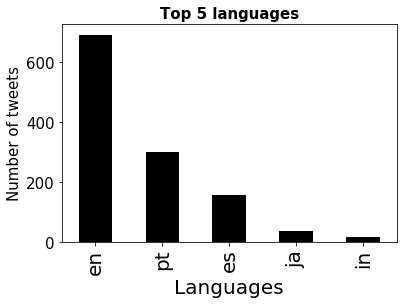

In [9]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis = 'x', labelsize = 20)
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('Languages', fontsize = 20)
ax.set_ylabel('Number of tweets' , fontsize = 15)
ax.set_title('Top 5 languages', fontsize = 15, fontweight = 'bold')
tweets_by_lang[:5].plot(ax = ax, kind = 'bar', color = 'black')

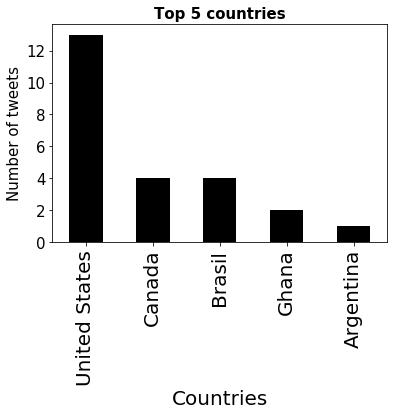

In [10]:
tweets_by_country  = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis = 'x', labelsize = 20)
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('Countries', fontsize = 20)
ax.set_ylabel('Number of tweets' , fontsize = 15)
ax.set_title('Top 5 countries', fontsize = 15, fontweight = 'bold')
tweets_by_country[:5].plot(ax = ax, kind = 'bar', color = 'black')

In [11]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [12]:
## filtrando aqueles q mais foram falados (termos mais influentes)## filtr 
pesquisas = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('ronaldo', tweet['text']):
            pesquisas.append('ronaldo')
        elif word_in_text('copa', tweet['text']):
            pesquisas.append('copa')
        elif word_in_text('girlpower', tweet['text']):
            pesquisas.append('girlpower')
        elif word_in_text('discovery', tweet['text']):
            pesquisas.append('discovery')
        elif word_in_text('game', tweet['text']):
            pesquisas.append('game')
        else:
            pesquisas.append('None')
tweets['pesquisa'] = pesquisas
tweets.head(20)

,lang,text,country,pesquisa
0,en,RT @CawthonUpdates: Oh my GOD the demo is a tr...,None,game
1,und,https://t.co/s0Yb5GkOjH,None,None
2,en,@zaqweOriginal @FortniteGame Try and get on an...,None,game
3,en,The board game that will test our friendship h...,None,game
4,pt,RT @moniqueppaes: ABSURDO ler os comentários d...,None,None
5,es,RT @2010MisterChip: #ARG 0-2 #CRO (82') #Rusia...,None,None
6,en,RT @HG_101: Boxes of all the books I'll be bri...,None,game
7,en,These Front Door Colors Are Instant Game-Chang...,None,game
8,en,@realDonaldTrump Tom Emmer - stop being such a...,None,None
9,en,RT @Chinohoven: Y’all are “so proud” to be Mex...,None,None


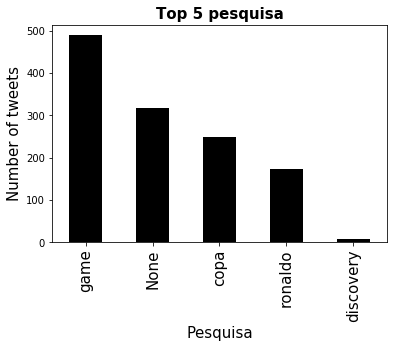

In [13]:
tweets_by_pesquisas  = tweets['pesquisa'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis = 'x', labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 10)
ax.set_xlabel('Pesquisa', fontsize = 15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 pesquisa', fontsize=15, fontweight='bold')
tweets_by_pesquisas[:6].plot(ax = ax, kind = 'bar', color = 'black')